<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
</center>
<center>Автор материала: аналитик-разработчик в команде Яндекс.Метрики Мария Мансурова

# <center> Домашнее задание № 9
## <center> Анализ временных рядов

In [169]:
import pandas as pd
import os

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
import requests
import pandas as pd

print(__version__) # need 1.9.0 or greater

init_notebook_mode(connected = True)




def plotly_df(df, title = ''):
    data = []
    
    for column in df.columns:
        trace = go.Scatter(
            x = df.index,
            y = df[column],
            mode = 'lines',
            name = column
        )
        data.append(trace)
    
    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

2.0.7


## Подготавливаем данные

Для начала скачаем данные в `dataframe`. Сегодня будем предсказывать просмотры wiki-страницы [Machine Learning](https://en.wikipedia.org/wiki/Machine_learning). Данные я скачала с помощью библиотеки [Wikipediatrend](https://www.r-bloggers.com/using-wikipediatrend/) для `R`.

In [170]:
df = pd.read_csv('../../data/wiki_machine_learning.csv', sep = ' ')
df = df[df['count'] != 0]
df.head()

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning


In [171]:
df.shape

(383, 7)

In [172]:
df.date = pd.to_datetime(df.date)

In [173]:
plotly_df(df.set_index('date')[['count']])

In [174]:
!pip install pystan


In [175]:
!pip install fbprophet

## Предсказание с помощью Facebook Prophet

Для начала построим предсказание с помощью простой библиотеки `Facebook Prophet`. Для того, чтобы посмотреть на качество модели, отбросим из обучающей выборки последние 30 дней.

In [176]:
from fbprophet import Prophet

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 81 to 372
Data columns (total 7 columns):
date     383 non-null datetime64[ns]
count    383 non-null int64
lang     383 non-null object
page     383 non-null object
rank     383 non-null int64
month    383 non-null int64
title    383 non-null object
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 23.9+ KB


In [178]:
df.head()

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning


In [179]:
predictions = 30

df = df[['date', 'count']]
df.columns = ['ds', 'y']
train_df = df[:-predictions].copy()
train_df.tail()


,ds,y
358,2015-12-17,2870
363,2015-12-18,2475
364,2015-12-19,1659
344,2015-12-20,1534
343,2015-12-21,2425


In [180]:
m = Prophet(yearly_seasonality=True)
m.fit(train_df);

future = m.make_future_dataframe(periods=predictions)

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
378,2016-01-16,2485.616440,2133.440108,2832.607656
379,2016-01-17,2646.161230,2298.721444,2998.256624
380,2016-01-18,3666.572427,3310.505360,4032.422892
381,2016-01-19,3937.067637,3583.816084,4319.186336
382,2016-01-20,3832.966614,3485.453086,4220.961452


In [181]:
print ( ', '.join(forecast.columns))

ds, t, trend, seasonal_lower, seasonal_upper, trend_lower, trend_upper, yhat_lower, yhat_upper, weekly, weekly_lower, weekly_upper, yearly, yearly_lower, yearly_upper, seasonal, yhat


In [182]:
forecast.tail()

,ds,t,trend,seasonal_lower,seasonal_upper,trend_lower,trend_upper,yhat_lower,yhat_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,seasonal,yhat
378,2016-01-16,1.073446,2946.748331,-461.131891,-461.131891,2946.748217,2946.748434,2133.440108,2832.607656,-860.441386,-860.441386,-860.441386,399.309494,399.309494,399.309494,-461.131891,2485.616440
379,2016-01-17,1.076271,2949.752360,-303.591130,-303.591130,2949.752238,2949.752469,2298.721444,2998.256624,-720.143785,-720.143785,-720.143785,416.552654,416.552654,416.552654,-303.591130,2646.161230
380,2016-01-18,1.079096,2952.756388,713.816039,713.816039,2952.756258,2952.756507,3310.505360,4032.422892,282.577995,282.577995,282.577995,431.238044,431.238044,431.238044,713.816039,3666.572427
381,2016-01-19,1.081921,2955.760417,981.307220,981.307220,2955.760280,2955.760544,3583.816084,4319.186336,538.054284,538.054284,538.054284,443.252936,443.252936,443.252936,981.307220,3937.067637
382,2016-01-20,1.084746,2958.764445,874.202169,874.202169,2958.764301,2958.764581,3485.453086,4220.961452,421.678742,421.678742,421.678742,452.523426,452.523426,452.523426,874.202169,3832.966614


In [183]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning:

pylab import has clobbered these variables: ['__version__', 'plot']
`%matplotlib` prevents importing * from pylab and numpy



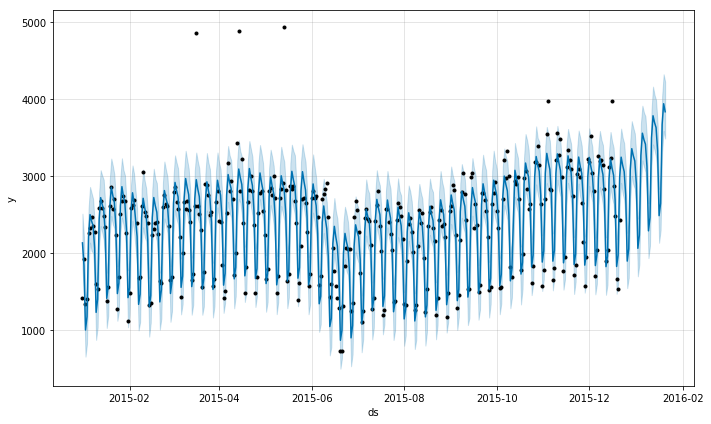

In [184]:
m.plot(forecast);

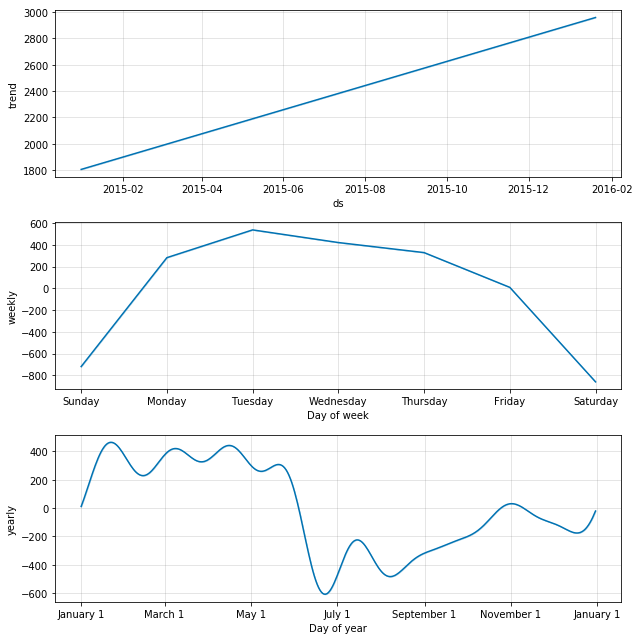

In [185]:
m.plot_components(forecast);

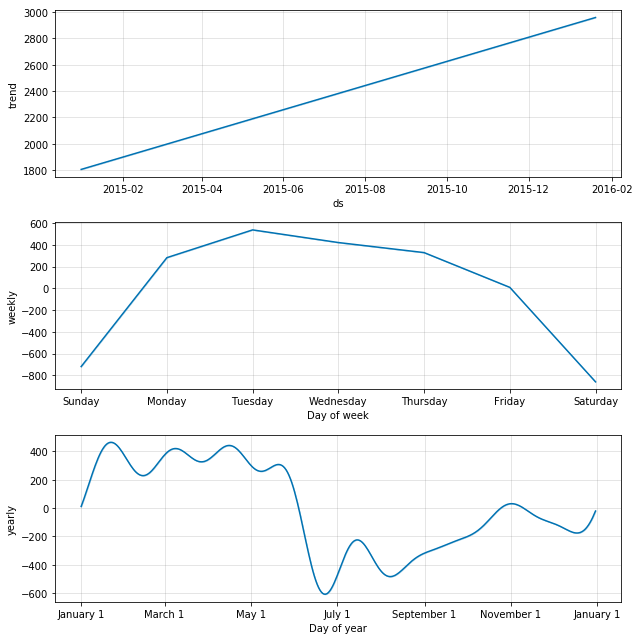

In [186]:
m.plot_components(forecast);

**Вопрос 1:** Какое предсказание числа просмотров wiki-страницы на 20 января? Ответ округлите до целого числа.

Оценим качество предсказания по последним 30 точкам.

In [187]:
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df.set_index('ds'))

In [188]:
import numpy as np
cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e']/cmp_df['y']
np.mean(abs(cmp_df[-predictions:]['p'])), np.mean(abs(cmp_df[-predictions:]['e']))

(38.388271762230275, 713.01104297046686)

**Вопрос 2**: Какое получилось MAPE?

**Вопрос 3**: Какое получилось MAE?

## Предсказываем с помощью ARIMA

In [189]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [190]:
df.head()


,ds,y
81,2015-01-01,1414
80,2015-01-02,1920
79,2015-01-03,1338
78,2015-01-04,1404
77,2015-01-05,2264


In [192]:
df.reset_index(drop=True)
df.head()


,ds,y
81,2015-01-01,1414
80,2015-01-02,1920
79,2015-01-03,1338
78,2015-01-04,1404
77,2015-01-05,2264


In [193]:
df['y']

81     1414
80     1920
79     1338
78     1404
77     2264
76     2327
75     2469
74     2349
73     2279
63     1600
64     1539
65     2581
66     2678
67     2584
68     2485
69     2336
70     1384
61     1556
62     2612
87     2860
86     2571
89     2697
88     2232
83     1280
82     1690
85     2501
84     2680
91     2737
90     2671
71     2261
       ... 
346    2469
345    2292
348    1671
347    1227
350    1367
349    1373
352    2181
351    2162
353    2107
354    1590
369    1159
370    1704
371    1724
365    3180
366    3180
367    3186
368    3055
373    2874
374    1674
380    1873
379    3083
378    3319
377    3145
384    3164
383    2743
382    1644
381    1836
376    2983
375    3389
372    3559
Name: y, dtype: int64

**Вопрос 4:** Проверим стационарность ряда с помощью критерия Дики-Фулера. Является ли ряд стационарным? Какое значение p-value?

In [162]:
sm.tsa.seasonal_decompose(df['y']).plot()
#print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df['y'])[1])

ValueError: You must specify a freq or x must be a pandas object with a timeseries index witha freq not set to None

**Вопрос 5**: Далее перейдем к построению модели SARIMAX (`sm.tsa.statespace.SARIMAX`). Модель c какими параметрами лучшая по `AIC`-критерию?

In [26]:
## ВАШ КОД для построения модели ##